In [15]:
import pandas as pd
import seaborn as sns


<Axes: >

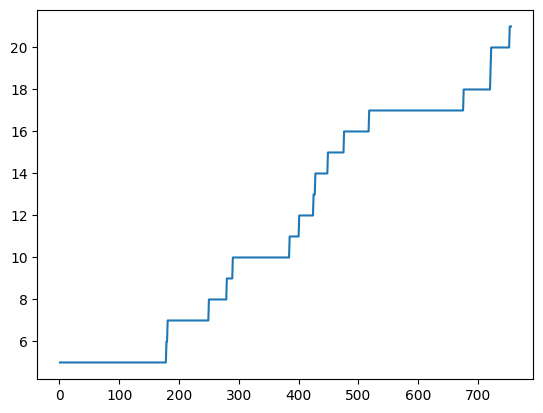

In [17]:
data1 = pd.read_csv("EXP1/data.csv",delimiter=";")


def sum_per_step(df):
    steps = []
    sum = []
    for step in df["step"].unique():
        steps.append(step)
        sum.append(len(df[(df.step==step) & (df.state == "infected") ]))
    return steps,sum

steps,sum = sum_per_step(data1)

sns.lineplot(x=steps,y=sum)